In [1]:
# numerical computation
import numpy as np

# import matplotlib and allow it to plot inline
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

# import sklearn
from sklearn.preprocessing import LabelEncoder

# visualization library
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":15})     

# dataframe management
import pandas as pd

from operator import itemgetter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
from IPython.display import clear_output

In [2]:
crg_5424 = pd.read_csv('../CRGs/datasets/matrix_CRG5424.csv')
crg_5424.head()

,Edad,Sexo,001,002,003,004,005,006,007,008,...,V09HA,V09HX,V09IA,V09IB,V09IX,V09XA,V10BX,V10XA,V10XX,V30ZZ
0,53,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,61,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,64,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,57,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
crg_5424.shape

(2166, 2265)

#### Controlamos si hay algún valor nulo con:

In [4]:
Edad = crg_5424[crg_5424.columns[0:1]]
columnas_Edad = list(Edad.columns.values)

Genero = crg_5424[crg_5424.columns[1:2]]
columnas_Edad = list(Edad.columns.values)

Diagnostico = crg_5424[crg_5424.columns[2:1519]]
columnas_Diagnostico = list(Diagnostico.columns.values)

Farmacia = crg_5424[crg_5424.columns[1519:]]
columnas_Farmacia = list(Farmacia.columns.values)

N_Pacientes = crg_5424.shape[0]

In [5]:
print(Edad.isnull().any().any())
print(Genero.isnull().any().any())
print(Diagnostico.isnull().any().any())
print(Farmacia.isnull().any().any())

False
False
False
False


#### Ahora con Género

In [6]:
femenino = Genero[Genero == 2]
femenino = femenino.fillna(value =0)

masculino = Genero[Genero == 1]
masculino = masculino.fillna(value =0)

femenino = femenino['Sexo'].tolist()
Genero.insert(1, 'Femenino', femenino)

masculino = masculino['Sexo'].tolist()
Genero.insert(2, 'Masculino', masculino)

del(Genero['Sexo'])
Genero = (Genero>0.0)*1

### Ahora que tenemos todos los datos bien estructurados, vamos a volver a juntarlos

In [7]:
crg_5424_new = pd.concat([Edad, Genero, Diagnostico, Farmacia], axis = 1)
columnas_data =list(crg_5424_new.columns.values)
print(crg_5424_new.shape)
crg_5424_new.head()

(2166, 2266)


,Edad,Femenino,Masculino,001,002,003,004,005,006,007,...,V09HA,V09HX,V09IA,V09IB,V09IX,V09XA,V10BX,V10XA,V10XX,V30ZZ
0,53,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,61,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,64,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,57,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
crg_5424_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Edad,2166.0,49.395660,15.468599,-18.0,41.0,52.0,59.0,95.0
Femenino,2166.0,0.347645,0.476333,0.0,0.0,0.0,1.0,1.0
Masculino,2166.0,0.652355,0.476333,0.0,0.0,1.0,1.0,1.0
001,2166.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
002,2166.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
003,2166.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
004,2166.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
005,2166.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
006,2166.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
007,2166.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [9]:
edad = crg_5424_new[crg_5424_new.columns[:1]]
columnas_edad = list(edad.columns.values)

genero = crg_5424_new[crg_5424_new.columns[1:3]]
columnas_genero = list(genero.columns.values)

diagnostico = crg_5424_new[crg_5424_new.columns[3:1520]]
columnas_diagnostico = list(diagnostico.columns.values)

farmacia = crg_5424_new[crg_5424_new.columns[1520:]]
columnas_farmacia = list(farmacia.columns.values)

In [10]:
enfermedades = diagnostico[diagnostico.columns[:999]]
columnas_enfermedades = list(enfermedades.columns.values)

codigo_v = diagnostico[diagnostico.columns[999:1090]]
columnas_codigo_v = list(codigo_v.columns.values)


In [11]:
N_mujeres = crg_5424_new[crg_5424_new['Femenino']==1].shape[0]

print('Porcenjate Mujeres: %.3f'% round((N_mujeres/N_Pacientes)*100, 3))

N_hombres = crg_5424_new[crg_5424_new['Masculino']==1].shape[0]

print('Porcenjate Hombres: %.3f'% round((N_hombres/N_Pacientes)*100, 3))

round(sum(crg_5424_new[crg_5424_new['Femenino']==1][crg_5424_new.columns[1520:]].sum())/N_mujeres, 2)



Porcenjate Mujeres: 34.765
Porcenjate Hombres: 65.235


23.25

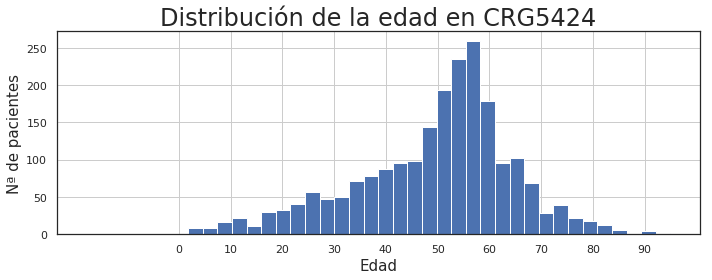

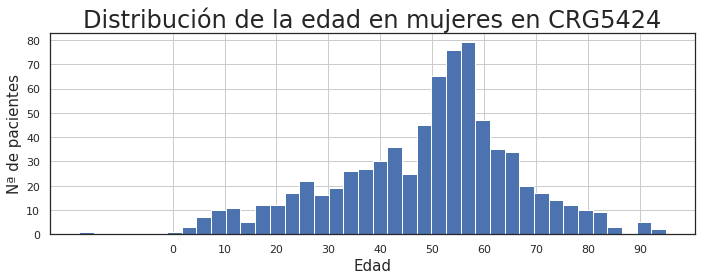

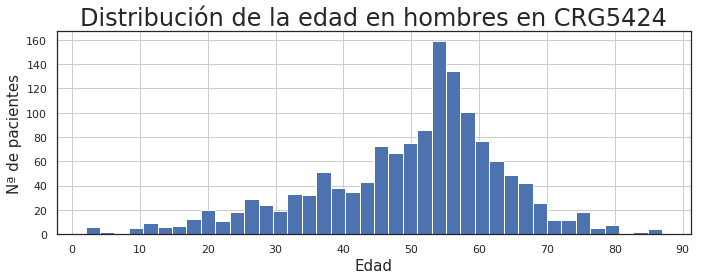

In [12]:
C = crg_5424_new[crg_5424_new.columns[:1]]
plt.figure(figsize=(10,4))
plt.hist(C.as_matrix(), bins=40)
plt.grid()
plt.xticks(range(0, 100, 10))
plt.xlabel('Edad')
plt.ylabel('Nª de pacientes')
plt.title('Distribución de la edad en CRG5424')
plt.tight_layout()
plt.savefig("pictures/CRG5424/CRG5424_EDAD.png")  
plt.show()

A = crg_5424_new[crg_5424_new.columns[:1]][crg_5424_new.Femenino==1]
plt.figure(figsize=(10,4))
plt.hist(A.as_matrix(), bins=40)
plt.grid()
plt.xticks(range(0, 100, 10))
plt.xlabel('Edad')
plt.ylabel('Nª de pacientes')
plt.title('Distribución de la edad en mujeres en CRG5424')
plt.tight_layout()
plt.savefig("pictures/CRG5424/CRG5424_EDAD_mujeres.png")  
plt.show()

B = crg_5424_new[crg_5424_new.columns[:1]][crg_5424_new.Masculino==1]
plt.figure(figsize=(10,4))
plt.hist(B.as_matrix(), bins=40)
plt.grid()
plt.xticks(range(0, 100, 10))
plt.xlabel('Edad')
plt.ylabel('Nª de pacientes')
plt.title('Distribución de la edad en hombres en CRG5424')
plt.tight_layout()
plt.savefig("pictures/CRG5424/CRG5424_EDAD_HOMBRES.png")        
plt.show()

# Ocurrencia

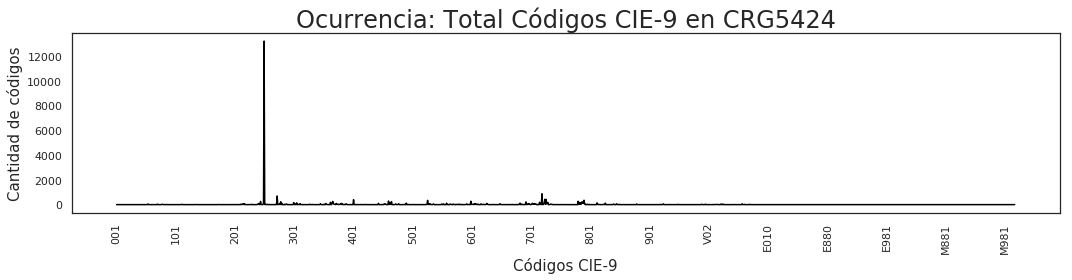

In [13]:
ploting = crg_5424_new[columnas_diagnostico].sum()

plt.figure(figsize=(15,4))
plt.plot(ploting, 'black')
plt.xticks(range(0, 1517, 100), rotation=90)
plt.ylabel('Cantidad de códigos')          
plt.xlabel('Códigos CIE-9')
plt.title('Ocurrencia: Total Códigos CIE-9 en CRG5424')
plt.tight_layout()
plt.savefig("pictures/CRG5424/CRG5424_O_CIE.png")     
plt.show()

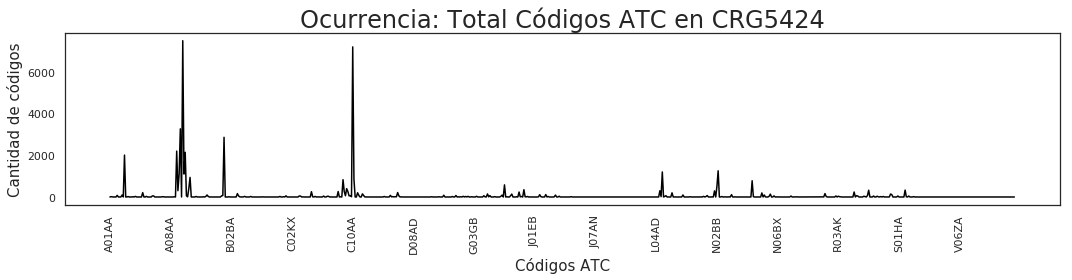

In [14]:
ploting = crg_5424_new[columnas_farmacia].sum()

plt.figure(figsize=(15,4))
plt.plot(ploting, 'black')
plt.xticks(range(0, len(ploting), 50), rotation=90)
plt.ylabel('Cantidad de códigos')         
plt.xlabel('Códigos ATC')
plt.title('Ocurrencia: Total Códigos ATC en CRG5424')
plt.tight_layout()
plt.savefig("pictures/CRG5424/CRG5424_O_ATC.png")     
plt.show()

## Ocurrencia de códigos CIE-9 según el genero

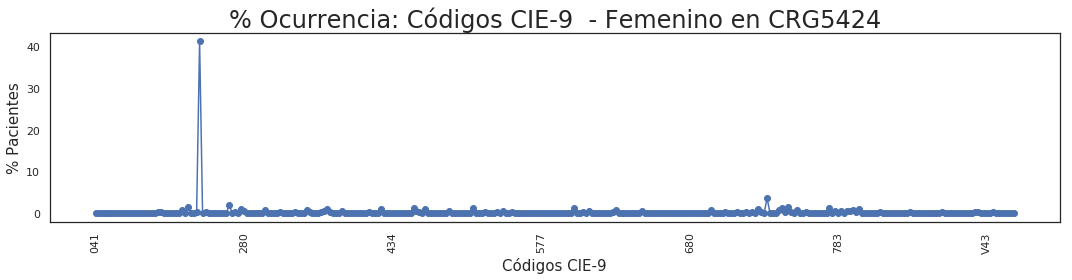

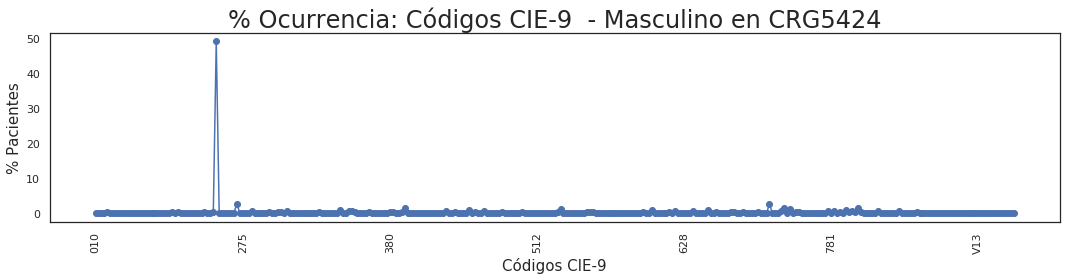

In [15]:
for g in columnas_genero:
    A = crg_5424_new[columnas_diagnostico][crg_5424_new[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        cie9 = [columnas_diagnostico[i] for i in list(ploting.nonzero()[0])]
        valor = [p for p in ploting if p !=0]
        diag_valor = pd.DataFrame({'Código' : cie9, 'Valor' : valor})
        diag_valor = diag_valor.set_index('Código')
        
        plt.figure(figsize=(15,4))
        #plt.grid()
        plt.plot(diag_valor, 'bo-')
        plt.xticks(range(0, len(valor), 50), rotation=90)
        plt.ylabel('% Pacientes')        
        plt.xlabel('Códigos CIE-9')
        plt.title('% Ocurrencia: Códigos CIE-9  - {} en CRG5424'.format(g))
        plt.tight_layout()
        plt.savefig("pictures/CRG5424/CRG5424_O_CIE_{}.png".format(g))        
        plt.show()


In [16]:
for g in columnas_genero:
    A = crg_5424_new[columnas_codigo_v][crg_5424_new[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        MAX_valor = pd.DataFrame({'Código' : columnas_codigo_v, 'Valor' : ploting})
        MAX_valor = MAX_valor.set_index('Código')
        print('Grupos mayoritarios para {}'.format(g))
        print(MAX_valor.sort_index(by='Valor',  ascending=False).head())

Grupos mayoritarios para Femenino
            Valor
Código           
V22     25.824176
V58     16.483516
V25     13.736264
V27      8.791209
V16      6.043956
Grupos mayoritarios para Masculino
           Valor
Código          
V58     28.12500
V25     17.18750
V62     15.62500
V71     11.71875
V16      5.46875


## Ocurrencia  de ATC según el genero

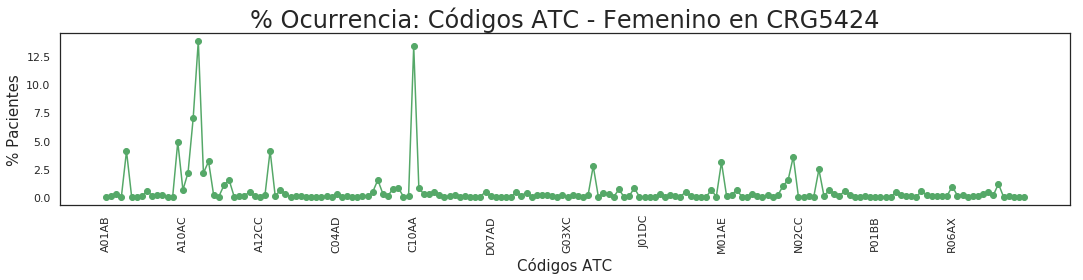

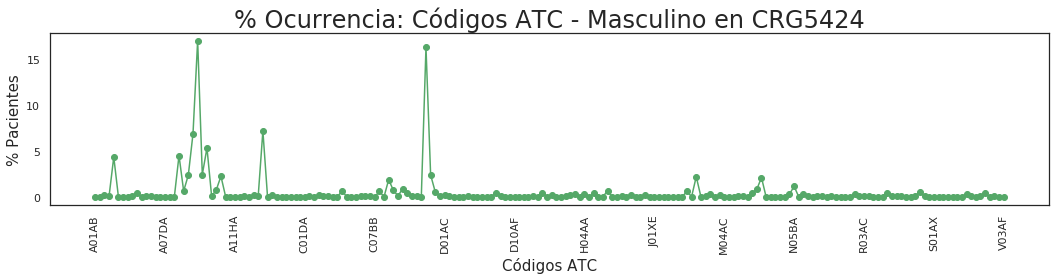

In [17]:
for g in columnas_genero:
    A = crg_5424_new[columnas_farmacia][crg_5424_new[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        atc = [columnas_farmacia[i] for i in list(ploting.nonzero()[0])]
        valor = [p for p in ploting if p !=0]
        diag_valor = pd.DataFrame({'Código' : atc, 'Valor' : valor})
        diag_valor = diag_valor.set_index('Código')
        
        plt.figure(figsize=(15,4))
        #plt.grid()
        plt.plot(diag_valor, 'go-')
        plt.xticks(range(0, len(valor), 15), rotation=90)
        plt.ylabel('% Pacientes')        
        plt.xlabel('Códigos ATC')
        plt.title('% Ocurrencia: Códigos ATC - {} en CRG5424'.format(g))
        plt.tight_layout()
        plt.savefig("pictures/CRG5424/CRG5424_O_ATC_{}.png".format(g))        
        plt.show()

In [18]:
for g in columnas_genero:
    A = crg_5424_new[columnas_farmacia][crg_5424_new[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        MAX_valor = pd.DataFrame({'Código' : columnas_farmacia, 'Valor' : ploting})
        MAX_valor = MAX_valor.set_index('Código')
        print('Grupos mayoritarios para {}'.format(g))
        print(MAX_valor.sort_index(by='Valor',  ascending=False).head())

Grupos mayoritarios para Femenino
            Valor
Código           
A10BA   13.889999
C10AA   13.410246
A10AE    6.990691
A10AB    4.906048
B01AC    4.112171
Grupos mayoritarios para Masculino
            Valor
Código           
A10BA   17.032727
C10AA   16.319666
B01AC    7.207965
A10AE    6.881706
A10BD    5.347953


--------------------------------------------------------------

# Presencia

In [19]:
presencia = (crg_5424_new[crg_5424_new.columns[3:]]>0)*1
crg_5424_new_P = pd.concat([Edad, Genero, presencia], axis = 1)

In [20]:
crg_5424_new_P.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Edad,2166.0,49.395660,15.468599,-18.0,41.0,52.0,59.0,95.0
Femenino,2166.0,0.347645,0.476333,0.0,0.0,0.0,1.0,1.0
Masculino,2166.0,0.652355,0.476333,0.0,0.0,1.0,1.0,1.0
001,2166.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
002,2166.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
003,2166.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
004,2166.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
005,2166.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
006,2166.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
007,2166.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


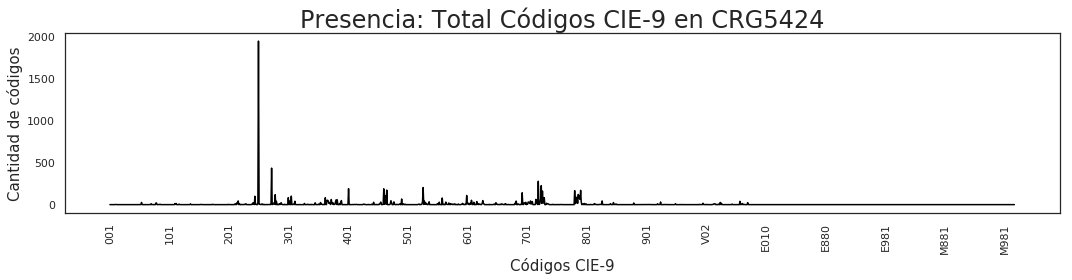

In [21]:
ploting = crg_5424_new_P[columnas_diagnostico].sum()

plt.figure(figsize=(15,4))
plt.plot(ploting, 'black')
plt.xticks(range(0, 1517, 100), rotation=90)
plt.ylabel('Cantidad de códigos')        
plt.xlabel('Códigos CIE-9')
plt.title('Presencia: Total Códigos CIE-9 en CRG5424')
plt.tight_layout()
plt.savefig("pictures/CRG5424/CRG5424_P_CIE.png")     
plt.show()

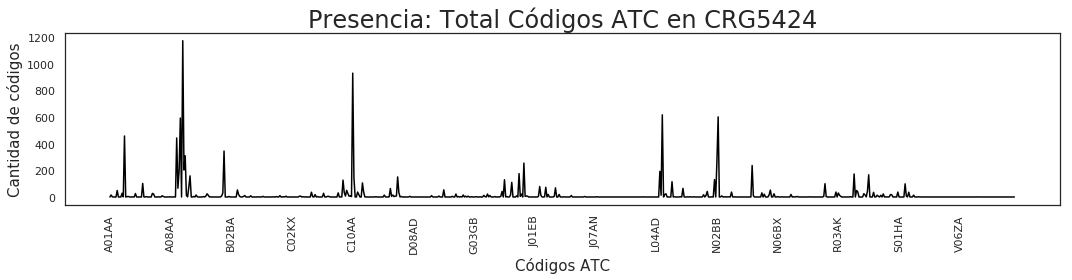

In [22]:
ploting = crg_5424_new_P[columnas_farmacia].sum()

plt.figure(figsize=(15,4))
plt.plot(ploting, 'black')
plt.xticks(range(0, len(ploting), 50), rotation=90)
plt.ylabel('Cantidad de códigos')         
plt.xlabel('Códigos ATC')
plt.title('Presencia: Total Códigos ATC en CRG5424')
plt.tight_layout()
plt.savefig("pictures/CRG5424/CRG5424_P_ATC.png")     
plt.show()

## Presencia de diagnosticos según el grupo de edad y genero

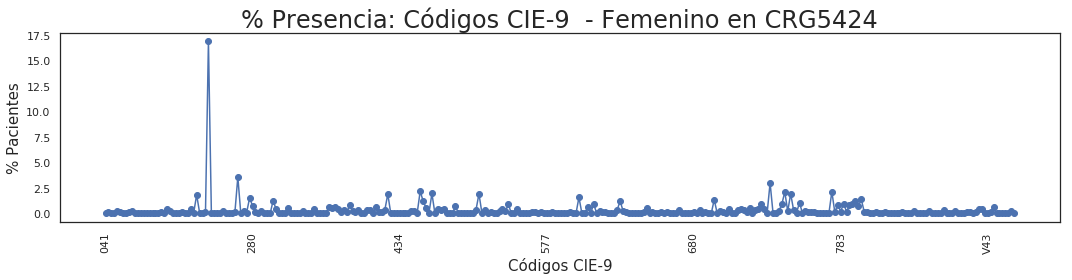

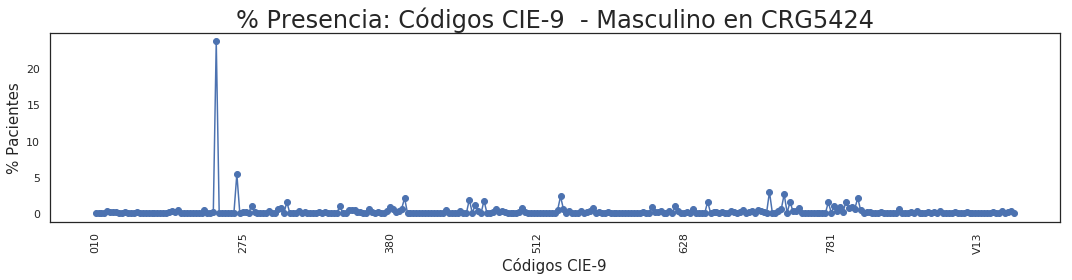

In [23]:
for g in columnas_genero:
    A = crg_5424_new_P[columnas_diagnostico][crg_5424_new_P[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        cie9 = [columnas_diagnostico[i] for i in list(ploting.nonzero()[0])]
        valor = [p for p in ploting if p !=0]
        diag_valor = pd.DataFrame({'Código' : cie9, 'Valor' : valor})
        diag_valor = diag_valor.set_index('Código')
        
        plt.figure(figsize=(15,4))
        #plt.grid()
        plt.plot(diag_valor, 'bo-')
        plt.xticks(range(0, len(valor), 50), rotation=90)
        plt.ylabel('% Pacientes')        
        plt.xlabel('Códigos CIE-9')
        plt.title('% Presencia: Códigos CIE-9  - {} en CRG5424'.format(g))
        plt.tight_layout()
        plt.savefig("pictures/CRG5424/CRG5424_P_CIE_{}.png".format(g))        
        plt.show()



In [24]:
for g in columnas_genero:
    A = crg_5424_new_P[columnas_diagnostico][crg_5424_new_P[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        MAX_valor = pd.DataFrame({'Código' : columnas_diagnostico, 'Valor' : ploting})
        MAX_valor = MAX_valor.set_index('Código')
        print('Grupos mayoritarios para {}'.format(g))
        print(MAX_valor.sort_index(by='Valor',  ascending=False).head())

Grupos mayoritarios para Femenino
            Valor
Código           
250     16.864428
272      3.584953
719      3.004292
460      2.171169
780      2.145923
Grupos mayoritarios para Masculino
            Valor
Código           
250     23.718425
272      5.423477
719      2.953195
724      2.637444
526      2.340267


## Presencia  de farmacos según el genero y edad

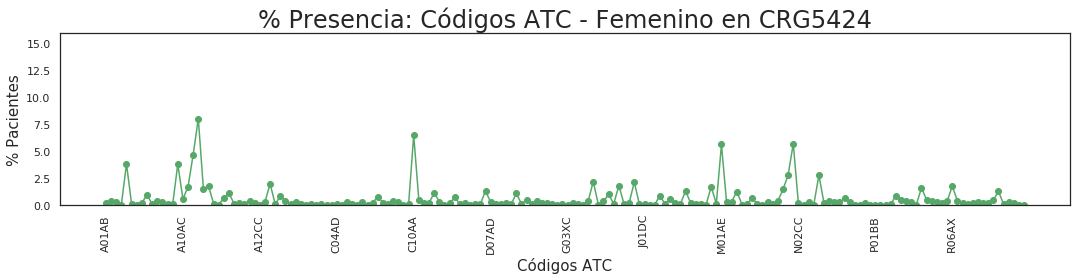

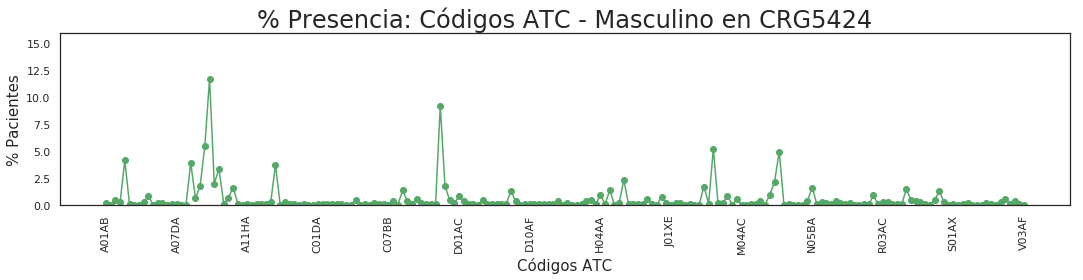

In [25]:
for g in columnas_genero:
    A = crg_5424_new_P[columnas_farmacia][crg_5424_new_P[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        atc = [columnas_farmacia[i] for i in list(ploting.nonzero()[0])]
        valor = [p for p in ploting if p !=0]
        diag_valor = pd.DataFrame({'Código' : atc, 'Valor' : valor})
        diag_valor = diag_valor.set_index('Código')
        
        plt.figure(figsize=(15,4))
        #plt.grid()
        plt.plot(diag_valor, 'go-')
        plt.xticks(range(0, len(valor), 15), rotation=90)
        plt.ylim(0.0, 16.0)
        plt.ylabel('% Pacientes')        
        plt.xlabel('Códigos ATC')
        plt.title('% Presencia: Códigos ATC - {} en CRG5424'.format(g))
        plt.tight_layout()
        plt.savefig("pictures/CRG5424/CRG5424_P_ATC_{}.png".format(g))        
        plt.show()

In [26]:
for g in columnas_genero:
    A = crg_5424_new_P[columnas_farmacia][crg_5424_new_P[g]==1]
    ploting = (((A.sum())/sum(A.sum()))*100)
    if ploting.max() > 0:
        MAX_valor = pd.DataFrame({'Código' : columnas_farmacia, 'Valor' : ploting})
        MAX_valor = MAX_valor.set_index('Código')
        print('Grupos mayoritarios para {}'.format(g))
        print(MAX_valor.sort_index(by='Valor',  ascending=False).head())

Grupos mayoritarios para Femenino
           Valor
Código          
A10BA   8.019888
C10AA   6.463467
N02BE   5.685257
M01AE   5.620406
A10AE   4.669261
Grupos mayoritarios para Masculino
            Valor
Código           
A10BA   11.732984
C10AA    9.226060
A10AE    5.509401
M01AE    5.217898
N02BE    4.955546


# Multi label

In [27]:
crg_5424_with_labels_O = crg_5424
crg_5424_with_labels_O['HP'] = np.zeros(N_Pacientes, dtype=int)
crg_5424_with_labels_O['Diabetes'] = np.ones(N_Pacientes, dtype=int)
crg_5424_with_labels_O['Otros'] = np.zeros(N_Pacientes, dtype=int)
crg_5424_with_labels_O['M01AE'].describe()

count    2166.000000
mean        0.554017
std         1.350935
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        21.000000
Name: M01AE, dtype: float64

In [28]:
crg_5424_with_labels_O.to_csv('datasets/label/crg_5424_with_labels_O.csv', index=False)

In [29]:
crg_5424_with_labels_P = pd.concat([Edad, crg_5424[crg_5424.columns[1:2]], presencia], axis = 1)
crg_5424_with_labels_P['HP'] = np.zeros(N_Pacientes, dtype=int)
crg_5424_with_labels_P['Diabetes'] = np.ones(N_Pacientes, dtype=int)
crg_5424_with_labels_P['Otros'] = np.zeros(N_Pacientes, dtype=int)
crg_5424_with_labels_P['M01AE'].describe()

count    2166.000000
mean        0.285319
std         0.451670
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: M01AE, dtype: float64

In [30]:
crg_5424_with_labels_P.to_csv('datasets/label/crg_5424_with_labels_P.csv', index=False)

# Multi clase

In [28]:
crg_5424_with_classes_O = pd.read_csv('../CRGs/datasets/matrix_CRG5424.csv')
crg_5424_with_classes_O['CRG1000'] = np.zeros(N_Pacientes, dtype=int)
crg_5424_with_classes_O['CRG5192'] = np.zeros(N_Pacientes, dtype=int)
crg_5424_with_classes_O['CRG5424'] = np.ones(N_Pacientes, dtype=int)
crg_5424_with_classes_O['CRG6144'] = np.zeros(N_Pacientes, dtype=int)
crg_5424_with_classes_O['CRG7071'] = np.zeros(N_Pacientes, dtype=int)
crg_5424_with_classes_O['M01AE'].describe()

count    2166.000000
mean        0.554017
std         1.350935
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        21.000000
Name: M01AE, dtype: float64

In [29]:
crg_5424_with_classes_O.to_csv('datasets/class/crg_5424_with_classes_O.csv', index=False)

In [30]:
crg_5424_with_classes_P = pd.concat([Edad, crg_5424[crg_5424.columns[1:2]], presencia], axis = 1)
crg_5424_with_classes_P['CRG1000'] = np.zeros(N_Pacientes, dtype=int)
crg_5424_with_classes_P['CRG5192'] = np.zeros(N_Pacientes, dtype=int)
crg_5424_with_classes_P['CRG5424'] = np.ones(N_Pacientes, dtype=int)
crg_5424_with_classes_P['CRG6144'] = np.zeros(N_Pacientes, dtype=int)
crg_5424_with_classes_P['CRG7071'] = np.zeros(N_Pacientes, dtype=int)
crg_5424_with_classes_P['M01AE'].describe()

count    2166.000000
mean        0.285319
std         0.451670
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: M01AE, dtype: float64

In [31]:
crg_5424_with_classes_P.to_csv('datasets/class/crg_5424_with_classes_P.csv', index=False)